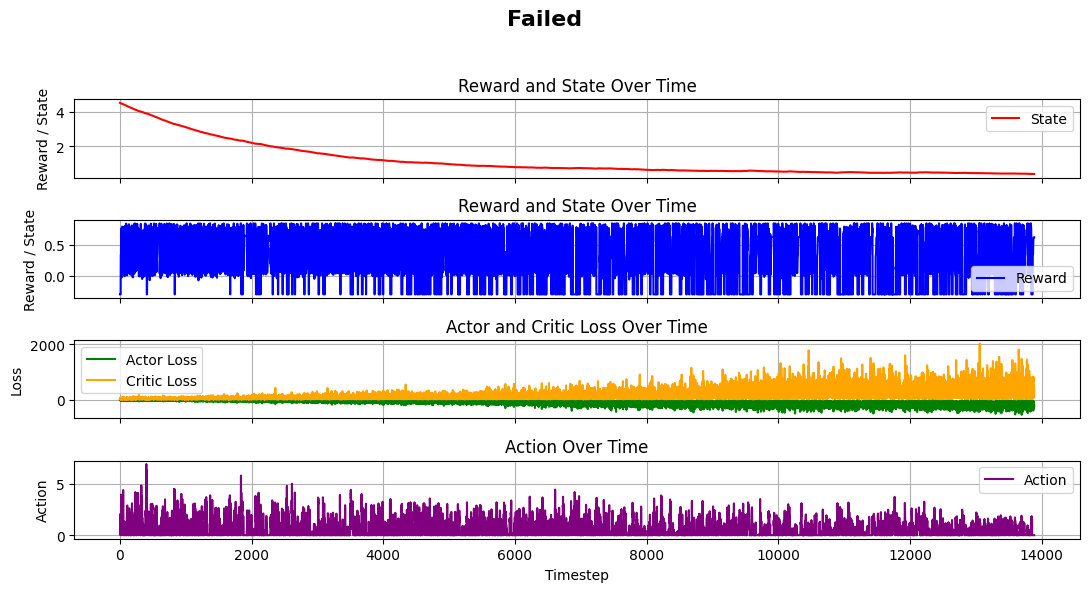

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from Logging_andplot import Logger

logger = Logger()
# Load the log data
log_data = logger.load_csv(r'D:\Project_end\DDPG_NEW_git\Auto_save_data_log\normalized\data_log\data_log4_.csv')
#y = logger.result_column('reward_state')
y = logger.result_column('reward_error')
#y = logger.result_column('reward_action')
y1 = logger.result_column('state')
y2 = logger.result_column('actor_loss')
y3 = logger.result_column('critic_loss')
y4 = logger.result_column('action')
status = logger.result_column('train_status')
status = status
status = status[-1]
x = np.arange(len(y))  # Create an x-axis based on the length of y
fig, axs = plt.subplots(4, 1, figsize=(11, 6), sharex=True)

# ===== แถวที่ 1: Reward และ State =====

axs[0].plot(x, y1, label='State', color='red')
axs[0].set_ylabel('Reward / State')
axs[0].set_title('Reward and State Over Time')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(x, y, label='Reward', color='blue')
axs[1].set_ylabel('Reward / State')
axs[1].set_title('Reward and State Over Time')
axs[1].legend()
axs[1].grid(True)

# ===== แถวที่ 2: Actor และ Critic Loss =====
axs[2].plot(x, y2, label='Actor Loss', color='green')
axs[2].plot(x, y3, label='Critic Loss', color='orange')
axs[2].set_ylabel('Loss')
axs[2].set_title('Actor and Critic Loss Over Time')
axs[2].legend()
axs[2].grid(True)

# ===== แถวที่ 3: Action =====
axs[3].plot(x, y4, label='Action', color='purple')
axs[3].set_ylabel('Action')
axs[3].set_title('Action Over Time')
axs[3].legend()
axs[3].grid(True)

# แกน x ด้านล่างสุด
axs[3].set_xlabel('Timestep')

# จัด layout ให้พอดี
title_text = "Passed" if status else "Failed"
fig.suptitle(title_text, fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Text(0.5, 0, 'Timestep')

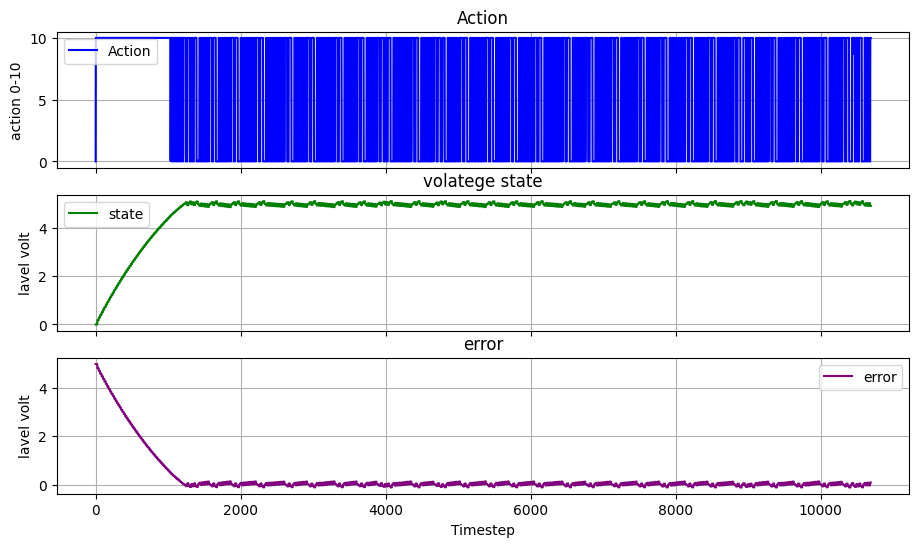

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from Logging_andplot import Logger

logger = Logger()
# Load the log data
log_data = logger.load_csv(r'D:\Project_end\DDPG_NEW_git\Auto_save_data_log\n_step_round_5\data_log_test\test_aget_real_work_3.csv')

y = logger.result_column('data_action')
y1 = logger.result_column('data_state')
y2 = logger.result_column('data_per_error')
y3 = logger.result_column('datal_intergla')
fig, axs = plt.subplots(3, 1, figsize=(11, 6), sharex=True)
x = np.arange(len(y))

axs[0].plot(x, y, label='Action', color='blue')
axs[0].set_ylabel('action 0-10')
axs[0].set_title('Action')
axs[0].legend()
axs[0].grid(True)

# ===== แถวที่ 2: Actor และ Critic Loss =====
axs[1].plot(x, y1, label='state', color='green')
axs[1].set_ylabel('level volt')
axs[1].set_title('volatege state')
axs[1].legend()
axs[1].grid(True)

# ===== แถวที่ 3: Action =====
axs[2].plot(x, y2, label='error', color='purple')
axs[2].set_ylabel('level volt')
axs[2].set_title('error')
axs[2].legend()
axs[2].grid(True)

# แกน x ด้านล่างสุด
axs[2].set_xlabel('Timestep')


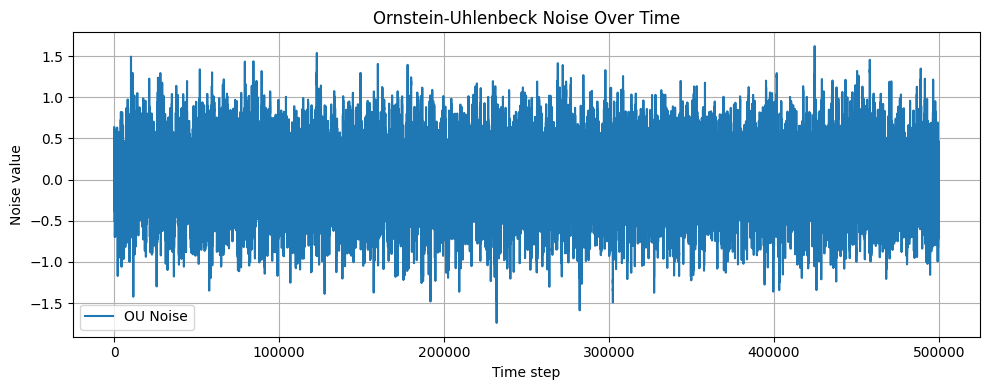

In [154]:
#noise
import numpy as np
import matplotlib.pyplot as plt

class OUNoise:
    def __init__(self, mu=0.0, theta=0.15, sigma=0.2, dt=1e-2):
        self.mu = mu
        self.theta = theta
        self.sigma = sigma
        self.dt = dt
        self.reset()

    def reset(self):
        self.x_prev = self.mu

    def sample(self):
        # OU process
        dx = self.theta * (self.mu - self.x_prev) * self.dt + \
             self.sigma * np.sqrt(self.dt) * np.random.randn()
        self.x_prev += dx
        return self.x_prev

# สร้าง noise
ou_noise = OUNoise(mu=0.0, theta=0.15, sigma=0.2, dt=1e-1)
samples = []

# เก็บข้อมูล 500 step
ou_noise.reset()
for _ in range(500000):
    samples.append(ou_noise.sample())

# plot noise
plt.figure(figsize=(10, 4))
plt.plot(samples, label='OU Noise')
plt.title('Ornstein-Uhlenbeck Noise Over Time')
plt.xlabel('Time step')
plt.ylabel('Noise value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



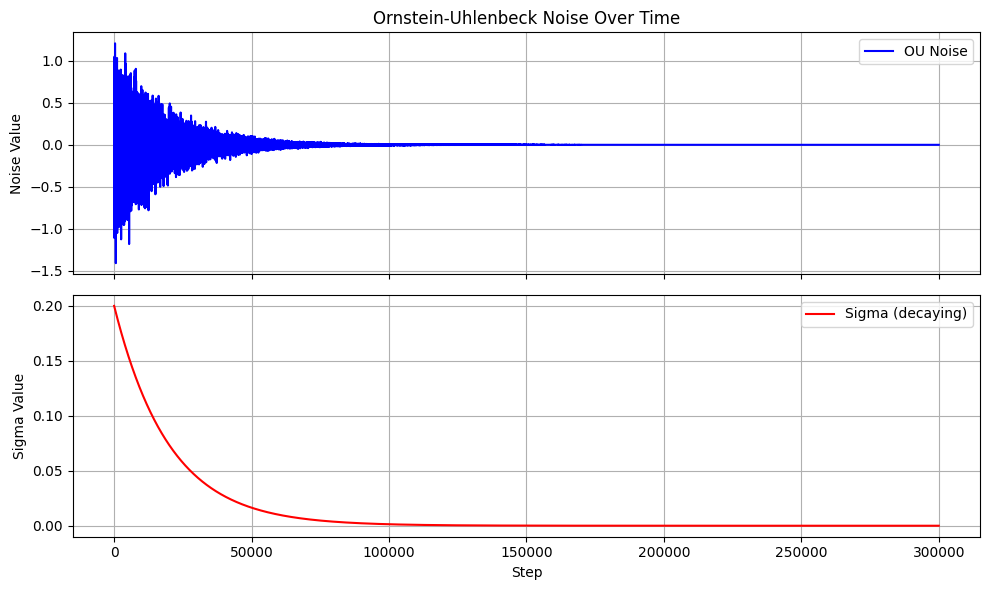

In [153]:
import numpy as np
import matplotlib.pyplot as plt

class OU_Noise:
    def __init__(self, action_dim=1, mu=0.0, theta=0.15, sigma=0.2, sigma_min=0.01, decay_rate=0.99):
        self.mu = mu
        self.theta = theta
        self.sigma = sigma
        self.initial_sigma = sigma
        self.sigma_min = sigma_min
        self.decay_rate = decay_rate
        self.action_dim = action_dim
        self.state = np.ones(self.action_dim) * self.mu
        self.step = 0
        self.sigma_history = []  # บันทึก sigma ในแต่ละ step

    def reset(self):
        self.state = np.ones(self.action_dim) * self.mu
        self.step = 0
        self.sigma = self.initial_sigma
        self.sigma_history = []

    def sample(self):
        self.sigma = max(self.sigma_min, self.initial_sigma * (self.decay_rate ** self.step))
        dx = self.theta * (self.mu - self.state) + self.sigma * np.random.randn(self.action_dim)
        self.state += dx
        self.step += 1
        self.sigma_history.append(self.sigma)
        return self.state


# ===== ใช้งาน OU Noise และเก็บข้อมูล =====
ou = OU_Noise(action_dim=1, sigma=0.2, sigma_min=0.0, decay_rate=0.99995)
ou.reset()

steps = 300000
noise_list = []
for _ in range(steps):
    noise = ou.sample()
    noise_list.append(noise[0])  # เพราะ action_dim = 1

# ===== Plot noise และ sigma ที่ลดลงเรื่อย ๆ =====
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot ค่า noise ที่สร้างได้
axs[0].plot(noise_list, label="OU Noise", color='blue')
axs[0].set_ylabel("Noise Value")
axs[0].set_title("Ornstein-Uhlenbeck Noise Over Time")
axs[0].legend()
axs[0].grid(True)

# Plot ค่า sigma ที่ลดลงเรื่อย ๆ
axs[1].plot(ou.sigma_history, label="Sigma (decaying)", color='red')
axs[1].set_xlabel("Step")
axs[1].set_ylabel("Sigma Value")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


0.4644681839294008


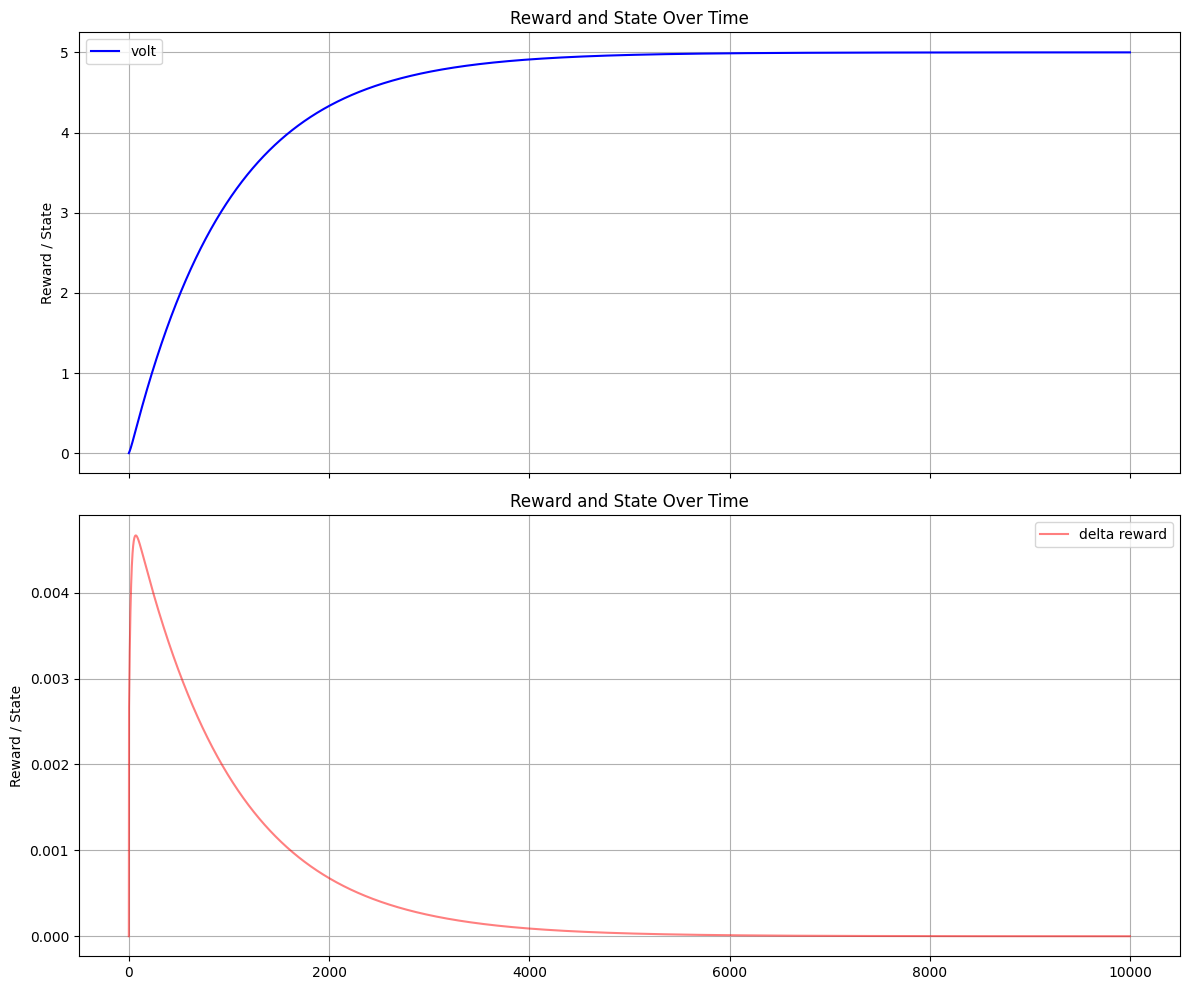

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from Agent import PID_Agent
PID = PID_Agent()



R = 2153
C = 0.01
V_cap = 0
# voltage_source = 5
setpoint = 5
delta_max,time,Volt,volt_actin = [],[],[],[]
reward, reward_delta,toal_reward = [],[],[]
per_error = setpoint - V_cap
def reward_function(error,setpoint,parameter_delta,per_error):
    pass
    parameter = setpoint / (0.3 * setpoint**2)
    reward = np.exp(-parameter * abs(error))

    delta_error = ( abs(per_error) - abs(error))

    toal_reward = reward+(delta_error*100)


    return reward,delta_error,toal_reward
def delta_reward(setpoint,V_cap_init):
    if setpoint - V_cap_init > 0:
        voltage_source = 10
    else:
        voltage_source = 0

    max_delta = (voltage_source - V_cap) / (R * C)
    print(max_delta)
    parameter = max_delta / (0.3 * max_delta)
    return parameter

init_parameter = delta_reward(setpoint=setpoint,V_cap_init=V_cap)

for i in range(10000):
    error = setpoint - V_cap
    output = PID.compute( error, Kp=0.001, Ki=0.01, Kd=0, dt=0.01)
    voltage_source = output * 10
    deltal_volt = (voltage_source - V_cap) / (R * C)
    V_cap += deltal_volt

    volt_actin.append(voltage_source)
    delta_max.append(deltal_volt)
    Volt.append(V_cap)
    reward_1,reward_delta_1, toal_reward_1= reward_function(error=error,setpoint=setpoint,parameter_delta=init_parameter,per_error=per_error)
    per_error = error
    reward.append(reward_1)
    reward_delta.append(reward_delta_1)
    toal_reward.append(toal_reward_1)
    
    

x = np.array(len(delta_max))
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

axs[0].plot(Volt, label='volt', color='blue')
axs[0].set_ylabel('Reward / State')
axs[0].set_title('Reward and State Over Time')
axs[0].legend()
axs[0].grid(True)

#axs[1].plot(reward, label='reward', color='blue')
axs[1].plot(reward_delta,label='delta reward',color='r',alpha=0.5)
#axs[1].plot(delta_max,label='delta max',color='b',alpha = 0.5)
#axs[1].plot(toal_reward,label='total reward',color='m',alpha=0.5)
axs[1].set_ylabel('Reward / State')
axs[1].set_title('Reward and State Over Time')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
   


-0.30303030303030304


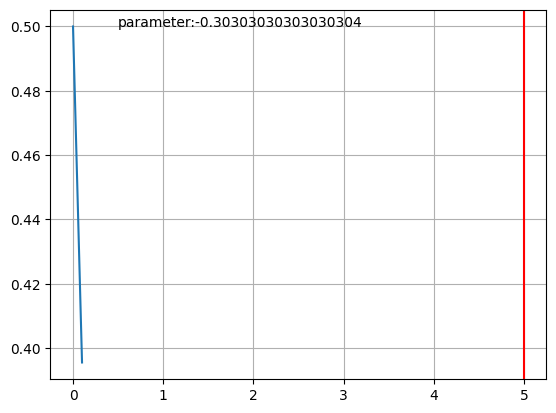

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Max_error = 10
parameter = Max_error / (0.33 * -Max_error**2)
print(parameter)
error = np.linspace(0,0.1,1000)
max = 0.5
min = -3
reward =(max - min) * np.exp((parameter)*(error)) + (min)
p = error

setpoint = 1
state = 0.8
erorr_user = 5
plt.plot(p,reward)
plt.axvline(erorr_user,color= 'r')
plt.text(0.5,0.5,f"parameter:{parameter}")
plt.grid()
plt.show()

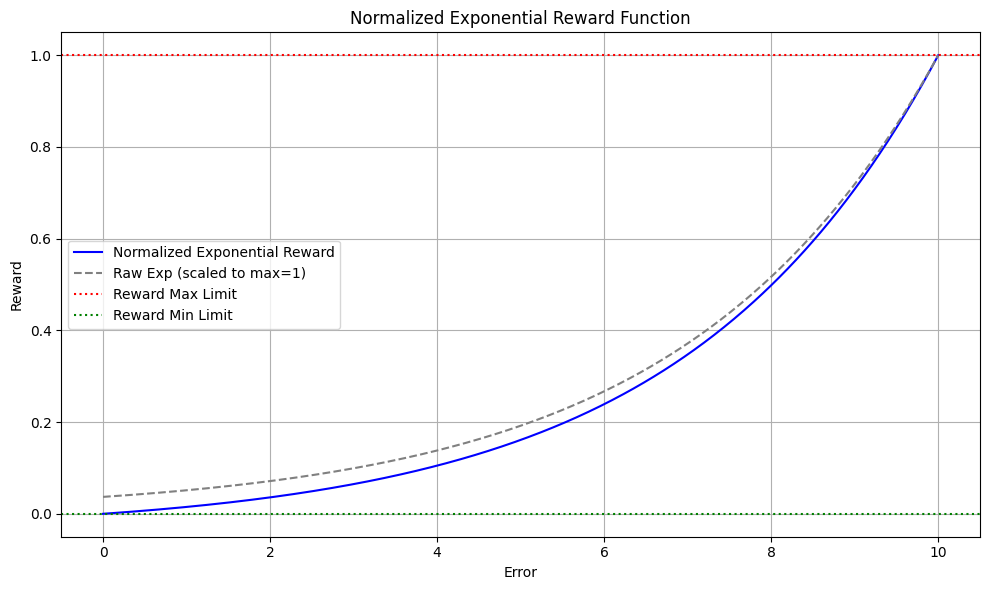

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
parameter = 0.33        # ความชันของ exponential
emin = 0              # ค่าน้อยสุดของ error
emax = 10               # ค่ามากสุดของ error
min_val = 0            # ค่าต่ำสุดของ reward ที่ต้องการ
max_val = 1            # ค่าสูงสุดของ reward ที่ต้องการ

# สร้างช่วงของ error
error = np.linspace(emin, emax, 500)

# ค่าดิบจาก exponential function
raw = np.exp(parameter * error)

# หา min/max จาก raw เพื่อ normalize
raw_min = np.exp(parameter * emin)
raw_max = np.exp(parameter * emax)

# Normalize แล้ว rescale ให้อยู่ในช่วง [min_val, max_val]
normalized = (raw - raw_min) / (raw_max - raw_min)
reward = (max_val - min_val) * normalized + min_val

# Plot
plt.figure(figsize=(10, 6))
plt.plot(error, reward, label='Normalized Exponential Reward', color='blue')
plt.plot(error, raw / np.max(raw), '--', label='Raw Exp (scaled to max=1)', color='gray')
plt.axhline(1, color='red', linestyle=':', label='Reward Max Limit')
plt.axhline(0, color='green', linestyle=':', label='Reward Min Limit')
plt.title('Normalized Exponential Reward Function')
plt.xlabel('Error')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


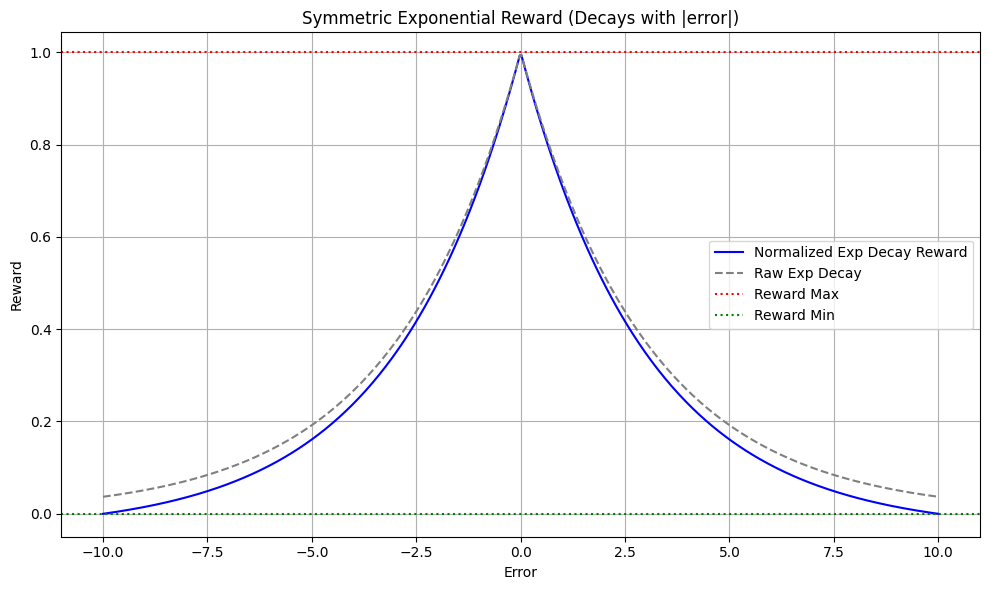

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
parameter = 0.33        # ควบคุมความแคบของโค้ง
emin = -10
emax = 10
min_val = 0.0
max_val = 1.0

# Error values
error = np.linspace(emin, emax, 500)

# Exponential decay using abs(error)
raw = np.exp(-parameter * np.abs(error))

# Normalize raw to [0, 1]
raw_min = np.min(raw)  # จะอยู่ที่ error = ±max
normalized = (raw - raw_min) / (1 - raw_min)
reward = (max_val - min_val) * normalized + min_val

# Plot
plt.figure(figsize=(10, 6))
plt.plot(error, reward, label='Normalized Exp Decay Reward', color='blue')
plt.plot(error, raw, '--', label='Raw Exp Decay', color='gray')
plt.axhline(max_val, color='red', linestyle=':', label='Reward Max')
plt.axhline(min_val, color='green', linestyle=':', label='Reward Min')
plt.title('Symmetric Exponential Reward (Decays with |error|)')
plt.xlabel('Error')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



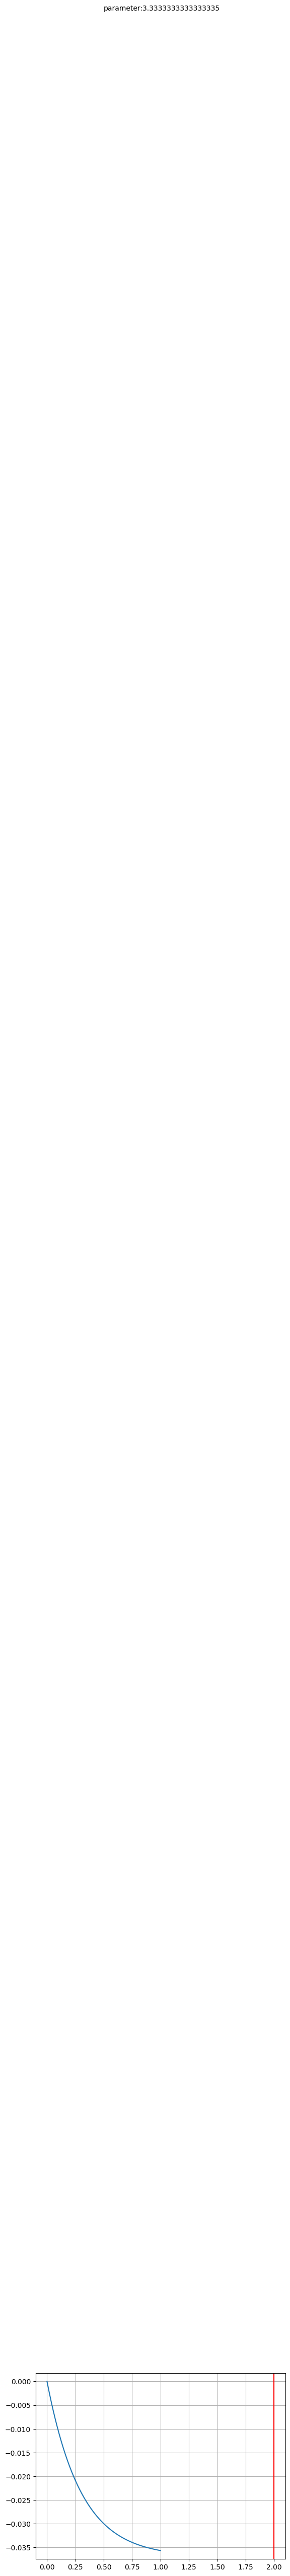

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Max_error = 1
parameter = Max_error / (0.3 * Max_error**2)
#print(parameter)

error = np.linspace(0,1,1000)
max = 1
min = 0
reward =np.exp(-3.33 * error)
normalized_reward = (reward - 1) / (np.exp(parameter) - 1)
p = error

setpoint = 1
state = 0.8
erorr_user = 2
plt.plot(p,normalized_reward)
plt.axvline(erorr_user,color= 'r')
plt.text(0.5,0.5,f"parameter:{parameter}")
plt.grid()
plt.show()

In [ ]:
from collections import deque

class compute_state:
    def __init__(self, c_retroactive_action=5, c_retroactive_error=5, c_retroactive_state=5):
        self.action_memory = deque([0] * c_retroactive_action,maxlen=c_retroactive_action)
        self.error_memory = deque(maxlen=c_retroactive_error)
        self.state_memory = deque(maxlen=c_retroactive_state)

    
    def retrun_state(self):
        print(self.action_memory)
       
    

com = compute_state()

com.retrun_state

<bound method compute_state.retrun_state of <__main__.compute_state object at 0x000002719E82BBC0>>

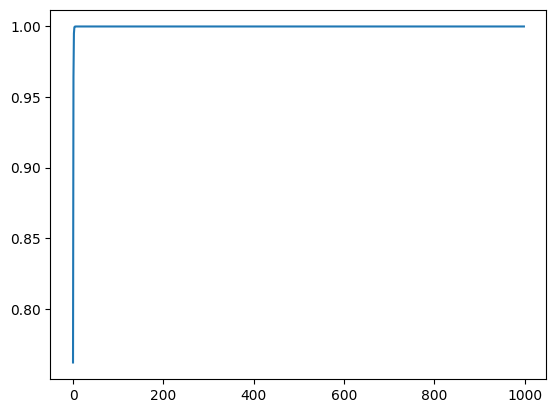

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x= np.linspace(0,1,1000)

data = []

for i in range(1,len(x)):
    data.append(np.tanh(x[i]))

plt.plot(data)
plt.show()

